# 异常检测——基于统计学的方法

>统计学⽅法对数据的正常性做出假定。它们假定正常的数据对象由⼀个统计模型产⽣，⽽不遵守该模型的数据是异常点。统计学⽅法的有效性⾼度依赖于对给定数据所做的统计模型假定是否成⽴。
>异常检测的统计学⽅法的⼀般思想是：学习⼀个拟合给定数据集的⽣成模型，然后识别该模型低概率区域中的对象，把它们作为异常点。即利⽤统计学⽅法建⽴⼀个模型，然后考虑对象有多⼤可能符合该模型。

根据上述定义，所以统计学方法可以理解为**通过先验**或者**通过输入的数据**，来确定一个**数据“应该”符合的模型**，那么如果存在点**以非常低的概率**符合模型（或者说是不符合模型），那么这就是一个**异常点**。

| 基于统计学方法的异常检测类型 | 特点 |
| ---- | ---- |
| 参数方法 | **首先**假定数据集符合一个$\Theta$参数的参数分布，那么这个参数分布的概率密度函数就会有每个x产生的概率，如果概率过低就可以认为是**异常值** |
| 非参数方法 | 通过输入的数据来确定模型，假定模型的参数以及个数都可灵活变化，**不预先确定**，所以**非参数方法也有参数** |

## 1.参数方法

参数方法一般会认为数据集符合某种已知的数据分布，如果实际数据过于复杂，一般单一的数据模型假定过于简单，可以假定数据是被混合参数分布产生的。

现在先以简单的正态分布举例。

**1.1 一元正态分布**

一元数据即仅涉及一种属性或一种变量的数据，假设数据符合一元正态分布，根据样本可得到参数$\mu$和$\sigma$，再根据参数计算每个x的概率，若概率过低则可认为是异常点：

假定输入数据集为${x^{(1)}, x^{(2)}, ..., x^{(m)}}$，数据集中的样本服从正态分布，即$x^{(i)}\sim N(\mu, \sigma^2)$，我们可以根据以下公式求$\mu$和$\sigma$：

>$\mu=\frac 1m\sum_{i=1}^m x^{(i)}$
>$\sigma^2$=\frac 1m\sum_{i=1}^m (x^{(i)}-\mu)^2$

再将$\mu$和$\sigma$代入计算概率密度：

>$p(x)=\frac 1{\sqrt{2\pi}\sigma}exp(-\frac{(x-\mu)^2}{2\sigma^2})$

如果计算出各点x的概率低于阈值，那么我们认为这是异常点；阈值的确定往往是经验值，**可以选择在验证集上使得评估指标值最大（也就是效果最好）的阈值取值作为最终阈值**

同时也可以应用3$\sigma$原则，即若不在($\mu$-3$\sigma$,$\mu$+3$\sigma$)内，则认为是异常点。

还可以用一些可视化方法判断异常点，下面用Python画一个简单的箱线图：

<AxesSubplot:>

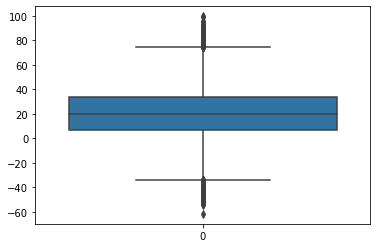

In [3]:
import numpy as np
import seaborn as sns
import matplotlib as plt

data = np.random.randn(50000) * 20 + 20
sns.boxplot(data = data)

**1.2 多元正态分布**

多元正态分布的原理与一元正态分布一样，许多⼀元异常点检测⽅法都可以扩充，⽤来处理多元数据。其核⼼思想是把多元异常点检测任务转换成⼀元异常点检测问题。例如基于正态分布的⼀元异常点检测扩充到多元情形时，可以求出每⼀维度的均值和标准差。对于第$j$维：

>$\mu_j=\frac 1m\sum_{i=1}^m x_j^{(i)}$

>$\sigma_j^2=\frac 1m\sum_{i=1}^m (x_j^{(i)}-\mu_j)^2$

计算概率时的概率密度函数为

>$p(x)=\prod_{j=1}^n p(x_j;\mu_j,\sigma_j^2)=\prod_{j=1}^n\frac 1{\sqrt{2\pi}\sigma_j}exp(-\frac{(x_j-\mu_j)^2}{2\sigma_j^2})$

这是在各个维度的特征之间相互独立的情况下。如果特征之间有相关性，就要用到多元高斯分布:

>$\mu=\frac{1}{m}\sum^m_{i=1}x^{(i)}$

>$\sum=\frac{1}{m}\sum^m_{i=1}(x^{(i)}-\mu)(x^{(i)}-\mu)^T$

>$p(x)=\frac{1}{(2 \pi)^{\frac{n}{2}}|\Sigma|^{\frac{1}{2}}} \exp \left(-\frac{1}{2}(x-\mu)^{T} \Sigma^{-1}(x-\mu)\right)$

## 2.非参数方法

>在异常检测的⾮参数⽅法中，“正常数据”的模型从输⼊数据学习，⽽不是假定⼀个先验。通常，⾮参数⽅法对数据做较少假定，因⽽在更多情况下都可以使⽤。

虽然但是，我并没有找到除可视化以外的其他非参数方法，大部分资料提到非参数方法都是**直方图**和**箱线图**，箱线图在**一元正态分布**的时候介绍了，在这介绍一下直方图：

直方图是一种频繁使用的非参数统计模型，可以用来检测异常点。该过程包括如下两步：

步骤1：构造直方图。使用输入数据（训练数据）构造一个直方图。该直方图可以是一元的，或者多元的（如果输入数据是多维的）。

尽管非参数方法并不假定任何先验统计模型，但是通常确实要求用户提供参数，以便由数据学习。例如，用户必须指定直方图的类型（等宽的或等深的）和其他参数（直方图中的箱数或每个箱的大小等）。与参数方法不同，**这些参数并不指定数据分布的类型**。

步骤2：检测异常点。为了确定一个对象是否是异常点，可以对照直方图检查它。**在最简单的方法中，如果该对象落入直方图的一个箱中，则该对象被看作正常的，否则被认为是异常点。**


对于更复杂的方法，可以使用直方图赋予每个对象一个异常点得分。例如令对象的异常点得分为该对象落入的箱的容积的倒数。

使用直方图作为异常点检测的非参数模型的一个缺点是，**很难选择一个合适的箱尺寸**，或者说非参数模型在"**参数**"的选择上是很难处理的。一方面，如果箱尺寸太小，则许多正常对象都会落入空的或稀疏的箱中，因而被误识别为异常点。另一方面，如果箱尺寸太大，则异常点对象可能渗入某些频繁的箱中，因而“假扮”成正常的。

## 3.HBOS

>HBOS全名为：Histogram-based Outlier Score。它是⼀种单变量⽅法的组合，不能对特征之间的依赖关系进⾏建模，但是计算速度较快，对⼤数据集友好。其基本假设是数据集的每个维度相互独⽴。然后对每个维度进⾏区间(bin)划分，区间的密度越⾼，异常评分越低。

总结而言：

* 优点：适合大数据，计算速度快；
* 缺点：无法得到特征、属性之间的相互作用关系；

HBOS算法流程：

1.为每个数据维度做出数据直方图。对分类数据统计每个值的频数并计算相对频率。对数值数据根据分布的不同采用以下两种方法：

* 静态宽度直方图：标准的直方图构建方法，在值范围内使用k个等宽箱。样本落入每个桶的频率（相对数量）作为密度（箱子高度）的估计。时间复杂度：$O(n)$

* 动态宽度直方图：首先对所有值进行排序，然后固定数量的$\frac{N}{k}$个连续值装进一个箱里，其 中N是总实例数，k是箱个数；直方图中的箱面积表示实例数。因为箱的宽度是由箱中第一个值和最后一个值决定的，所有箱的面积都一样，因此每一个箱的高度都是可计算的。这意味着跨度大的箱的高度低，即密度小，只有一种情况例外，超过k个数相等，此时允许在同一个箱里超过$\frac{N}{k}$值。时间复杂度：$O(n\times log(n))$

动态的方法对于实际情况更加贴合，在数据跨度特别大的适合静态这种“先验式”的、固定的可能会使得k过大或者过宽，动态的更加适合实际理解（虽然运算时间也会长一些）

2.对每个维度都计算了一个独立的直方图，其中每个箱子的高度表示密度的估计。然后为了使得最大高度为1（确保了每个特征与异常值得分的权重相等），对直方图进行归一化处理。最后，每一个实例的HBOS值由以下公式计算：

$$ H B O S(p)=\sum_{i=0}^{d} \log \left(\frac{1}{\text {hist}_{i}(p)}\right) $$

**推导过程：**

假设样本p第 i 个特征的概率密度为$p_i(p)$ ，则p的概率密度可以计算为： $$ P(p)=P_{1}(p) P_{2}(p) \cdots P_{d}(p) $$ 两边取对数： $$ \begin{aligned} \log (P(p)) &=\log \left(P_{1}(p) P_{2}(p) \cdots P_{d}(p)\right) =\sum_{i=1}^{d} \log \left(P_{i}(p)\right) \end{aligned} $$ 概率密度越大，异常评分越小，为了方便评分，两边乘以“-1”： $$ -\log (P(p))=-1 \sum_{i=1}^{d} \log \left(P_{t}(p)\right)=\sum_{i=1}^{d} \frac{1}{\log \left(P_{i}(p)\right)} $$ 最后可得： $$ H B O S(p)=-\log (P(p))=\sum_{i=1}^{d} \frac{1}{\log \left(P_{i}(p)\right)} $$

## 4.优缺点对比

* 异常检测的统计学方法由数据学习模型，以区别正常的数据对象和异常点。使用统计学方法的一个优点是，**异常检测可以是统计上无可非议的**。当然，仅当对数据所做的统计**假定满足实际约束**时才为真。

* HBOS在全局异常检测问题上表现良好，但**不能检测局部异常值**。但是**HBOS比标准算法快得多**，尤其是在大数据集上。

## 5.练习环节

In [21]:
from pyod.models.hbos import HBOS

import numpy as np
import pandas as pd
import matplotlib as plt

from pyod.utils.data import generate_data, evaluate_print
from pyod.utils.example import visualize

'基本参数'
contamination = 0.1
n_train = 10000
n_test = 500

'生成toy example数据集'
X_train, y_train, X_test, y_test = generate_data(n_train=n_train, n_test=n_test, contamination=contamination)

clf_name = 'HBOS'
clf = HBOS()
clf.fit(X_train)

'获取X_train的score & label'
y_train_pred = clf.labels_
y_train_scores = clf.decision_scores_

'获取X_test的scor & label'
y_test_pred = clf.predict(X_test)
y_test_scores = clf.decision_function(X_test)

'输出结果'
print("训练结果:")
evaluate_print(clf_name, y_train, y_train_scores)
print("测试结果:")
evaluate_print(clf_name, y_test, y_test_scores)

训练结果:
HBOS ROC:0.9776, precision @ rank n:0.8016
测试结果:
HBOS ROC:0.9761, precision @ rank n:0.84


D:\Anaconda\lib\site-packages\pyod\utils\data.py:185: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.8.0. Please use behaviour="new", which makes the returned datasets in the order of X_train, X_test, y_train, y_test.
  warn('behaviour="old" is deprecated and will be removed '


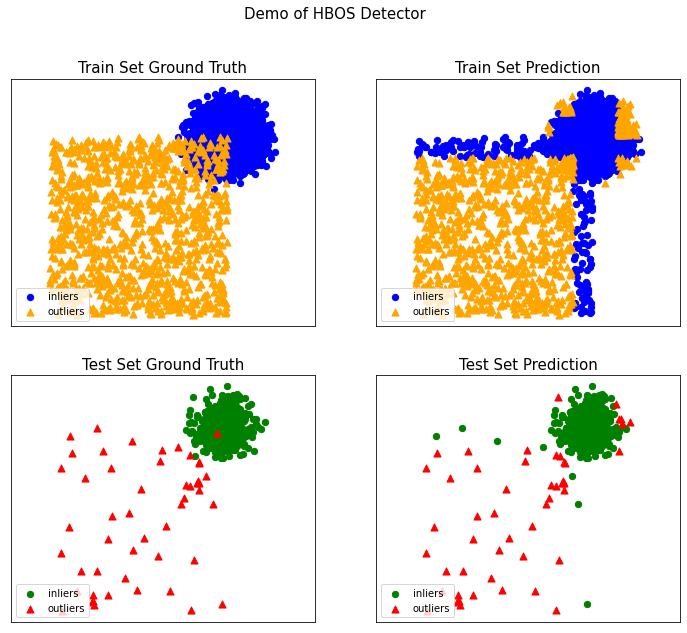

In [22]:
visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred, y_test_pred, show_figure=True, save_figure=False)

这里是参考了别人的过程拓展的**调参优化过程**qaq，自己再进一步思考（xdlxdl

从[官网](https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.hbos)上可以看到HBOS的一些可调参数：

> classpyod.models.hbos.HBOS(n_bins=10, alpha=0.1, tol=0.5, contamination=0.1)

> * n_bins (int, optional (default=10)) – The number of bins.
> * alpha (float in (0, 1), optional (default=0.1)) – The regularizer for preventing overflow.
> * tol (float in (0, 1), optional (default=0.5)) – The parameter to decide the flexibility while dealing the samples falling outside the bins.
> *contamination (float in (0., 0.5), optional (default=0.1)) – The amount of contamination of the data set, i.e. the proportion of outliers in the data set. Used when fitting to define the threshold on the decision function.

从parameter来看，n_bins应该指的是划分的区间（?），alpha是一个防止过度拟合的参数（越大越防止过度拟合？），tol我觉得**不太好理解**

> to decide the flexibility while dealing the samples falling outside the bins.

> 决定处理异常值时的灵活程度

这个应该越大越灵活（？）

由于官网上也没有对参数的变化趋势进行分析（可能也需要结合数据集来看8，所以emm let me try）

训练结果:
HBOS ROC:0.9776, precision @ rank n:0.8016
测试结果:
HBOS ROC:0.9761, precision @ rank n:0.84


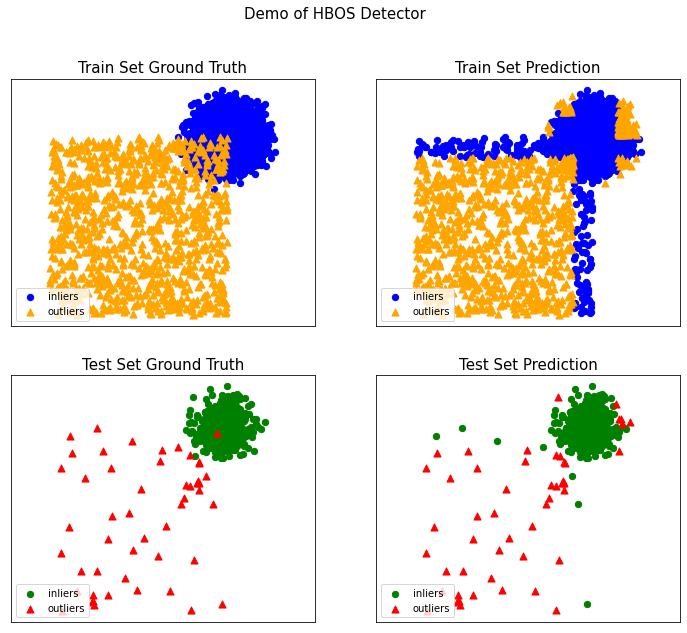

In [26]:
clf_name = 'HBOS'

'我试过很多数...tol的改变对结果没有影响'
clf = HBOS(tol = 0.001)
clf.fit(X_train)

'获取X_train的score & label'
y_train_pred = clf.labels_
y_train_scores = clf.decision_scores_

'获取X_test的scor & label'
y_test_pred = clf.predict(X_test)
y_test_scores = clf.decision_function(X_test)

'输出结果'
print("训练结果:")
evaluate_print(clf_name, y_train, y_train_scores)
print("测试结果:")
evaluate_print(clf_name, y_test, y_test_scores)

visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred, y_test_pred, show_figure=True, save_figure=False)

训练结果:
HBOS ROC:0.9817, precision @ rank n:0.9097
测试结果:
HBOS ROC:0.9814, precision @ rank n:0.94


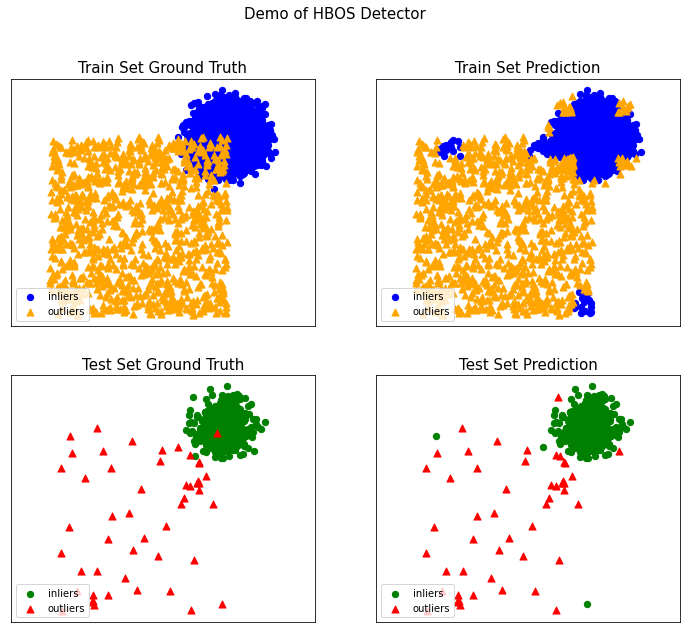

In [32]:
clf_name = 'HBOS'
clf = HBOS(alpha=0.01)
clf.fit(X_train)

'获取X_train的score & label'
y_train_pred = clf.labels_
y_train_scores = clf.decision_scores_

'获取X_test的scor & label'
y_test_pred = clf.predict(X_test)
y_test_scores = clf.decision_function(X_test)

'输出结果'
print("训练结果:")
evaluate_print(clf_name, y_train, y_train_scores)
print("测试结果:")
evaluate_print(clf_name, y_test, y_test_scores)

visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred, y_test_pred, show_figure=True, save_figure=False)

当alpha变大的时候ROC相差会大（alpha=0.99时，train0.9691，test0.9705），alpha小的话ROC相差更小